# Проект: анализ оттока клиентов банка

## Введение  

Банк «Метанпром» располагает данными о клиентах в Ярославле и областных городах: Ростов Великий и Рыбинск. Менеджеры продукта хотят на основе данных понять причины оттока клиентов и разработать меры по их удержанию.  

**Цель:**  
1. Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.  
2. Проверить гипотезы:  
    1) Доходы тех клиентов, которые ушли и тех, которые остались равны.  
    2) Средний возраст тех, кто ушел и тех, кто остался различается.  
3. Дать рекомендации по удержанию клиентов
   
Исследование проводится в 5 этапов:

1. Обзор данных  
2. Предобработка данных  
3. Исследовательский анализ данных   
4. Проверка гипотез  
5. Итоги исследования, рекомендации  

[Презентация](https://disk.yandex.ru/i/7VB5c915MDt0ew)

[Дашборд](https://public.tableau.com/app/profile/kseniia3828/viz/YandexPracticum_final_project/Dashboard1)

## Обзор данных  

Ознакомимся с входными данными.

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats as st

In [2]:
# игнорируем предупреждения

import warnings
warnings.filterwarnings('ignore') 

# снимем ограничения на вывод строк и столбцов

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# прочитаем файл с данными и сохраним его в переменную

data = pd.read_csv('/datasets/bank_dataset.csv')
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# получим общую информацию о таблице

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**В наличии следующие данные:**  

- `userid` — идентификатор пользователя,  
- `score` — баллы кредитного скоринга,  
- `City` — город,  
- `Gender` — пол,  
- `Age` — возраст,  
- `Objects` — количество объектов в собственности,  
- `Balance` — баланс на счёте,  
- `Products` — количество продуктов, которыми пользуется клиент,  
- `CreditCard` — есть ли кредитная карта,  
- `Loyalty` — активный клиент,  
- `estimated_salary` — заработная плата клиента,  
- `Churn` — ушёл или нет: 0 - те, кто остался, 1 - те, кто ушел  

### Выводы:  

В таблице 12 столбцов, названия столбцов нужно привести к единому стилю.  

В каждой строке таблицы — данные о клиенте банка.

В столбце Balance есть пропуски. Они составляют 36%.

Заменим значения "м" и "ж" в столбце gender на числовые.

Типы даннах во всех столбцах корректны.  

Текстовые данные приведем к нижнему регистру.

## Предобработка данных  

### Приведем написание названий столбцов к единому стилю

In [5]:
# поменяем названия столбцов

data = data.rename(columns={'userid':'user_id', 'CreditCard' : 'Credit_Card'})

# приведем названия столбцов к нижнему регистру и выведем названия для проверки

data.columns = data.columns.str.lower()
data.columns 

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

### Приведем текстовые данные к нижнему регистру

In [6]:
data['city'] = data['city'].str.lower()
data['gender'] = data['gender'].str.lower()

### Заменим пропуски в столбце balance  

Рассмотрим пропуски по признакам

In [7]:
# найдем пропуски в столбце balance и сохраним их в переменную

data_balance = data[data['balance'].isna()]

# найдем долю каждого признака из выбранных в общем количестве пропусков
# создаем цикл, который выведет долю по всем столбцам

data_balance_columns = data_balance[['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn', 'objects']]

for col in data_balance_columns: 
    print(col, ': ', data_balance[col].value_counts(normalize=True))
    print()

city :  ярославль    0.66851
рыбинск      0.33149
Name: city, dtype: float64

gender :  м    0.542715
ж    0.457285
Name: gender, dtype: float64

products :  2    0.718828
1    0.250207
3    0.027094
4    0.003871
Name: products, dtype: float64

credit_card :  1    0.716616
0    0.283384
Name: credit_card, dtype: float64

loyalty :  1    0.517832
0    0.482168
Name: loyalty, dtype: float64

churn :  0    0.861764
1    0.138236
Name: churn, dtype: float64

objects :  7     0.106718
2     0.105612
5     0.103401
4     0.102018
6     0.101465
8     0.100359
9     0.099530
3     0.097318
1     0.096489
10    0.049212
0     0.037877
Name: objects, dtype: float64



Больше всего пропусков:  
- среди клиентов в Ярославле - 67%
- у тех, кто использует 2 продукта банка - 72%
- у тех, кто имеет кредитную карту - 72%
- у клиентов, которые остались - 86%  

Наличие пропусков, скорее всего, не зависит от двух продуктов и факта того, что клиент остался с банком, так как это распространенные признаки клиента.  

Подозрительным кажется большой процент пропусков среди тех, кто имеет кредитную карту и находится в Ярославле. Рассмотрим эти признаки по кол-ву пропусков.

In [8]:
# выведем кол-во пропусков отдельно по признакам и совместно 

print('Ярославль и кредитная карта', ': ', data_balance.loc[(data_balance.loc[:, 'city'] == "ярославль") & (data_balance.loc[:, 'credit_card'] == 1)]['user_id'].count())

print('Ярославль', ': ', data_balance.loc[data_balance.loc[:, 'city'] == "ярославль"]['user_id'].count())

print('Кредитная карта', ': ', data_balance.loc[data_balance.loc[:, 'credit_card'] == 1]['user_id'].count())


Ярославль и кредитная карта :  1740
Ярославль :  2418
Кредитная карта :  2592


Наличие пропусков как-то связано с Ярославскими отделениями банка и кредитными картами. Нужно запросить информацию по заполнению данных, чтобы понять причину пропусков. На данном этапе заполнять пропуски ничем не будем, так как нет достаточной информации.

### Заменим значения в столбце gender на числовые  

"м" на 0  
"ж" на 1 

In [9]:
data['gender'] = data['gender'].replace('м',0)
data['gender'] = data['gender'].replace('ж',1)

### Проверим наличие дубликатов

In [10]:
# найдем сумму явных дубликатов

data.duplicated().sum()

0

### Найдем некорректные значения  

- Посмотрим на уникальные значения в столбцах 'city', 'age', gender', 'products', 'credit_card', 'loyalty', 'churn' и 'objects'

In [11]:
# сохраним в переменную unique_colomns таблицу с просматриваемыми столбцами

unique_columns = data[['city', 'age', 'gender', 'products', 'credit_card', 'loyalty', 'churn', 'objects']]

# создаем цикл, который выведет уникальные значения по всем столбцам

for col in unique_columns: 
    print(col, ': ', data[col].unique())
    print()

city :  ['ярославль' 'рыбинск' 'ростов великий']

age :  [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]

gender :  [1 0]

products :  [1 3 2 4]

credit_card :  [1 0]

loyalty :  [1 0]

churn :  [1 0]

objects :  [ 2  1  8  7  4  6  3 10  5  9  0]



- Определим, нет ли отрицательных значений и аномалий в столбцах score, balance, estimated_salary

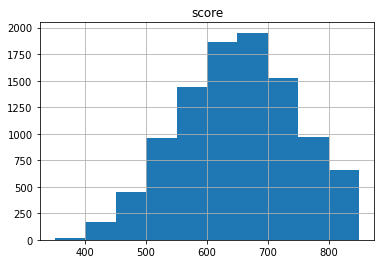

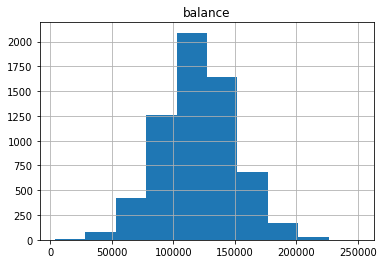

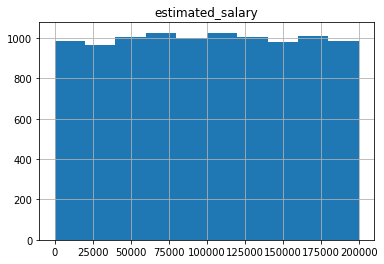

In [12]:
# сохраним в переменную negative_values_columns таблицу с просматриваемыми столбцами

negative_values_columns = data[['score', 'balance', 'estimated_salary']]

# создаем цикл, который построит гистограммы по всем столбцам

for col in negative_values_columns:
    negative_values_columns.hist(col)
    plt.show()

Во всех столбцах выбросов не наблюдается. 

**Выведем первые пять строк таблицы, чтобы проверить, что все изменения произошли**

In [13]:
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,ярославль,1,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,рыбинск,1,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,ярославль,1,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,ярославль,1,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,рыбинск,1,43,2,125510.82,1,1,1,79084.10,0


### Вывод  

Привели названия столбцов и текстовых данных в таблице к единому стилю.  

Пропуски в столбце balance оставили, так как нет достаточной информации, чтобы их заполнить.  

Заменили значения "м" и "ж" на числовые "0" и "1" соответственно.

Данные корректны: отрицательных значений, аномалий и дубликатов нет.

## Исследовательский анализ данных

In [14]:
# удалим столбец user_id для следующих расчетов

data_new = data.drop(['user_id'], axis=1)

### Оценим статистические показатели по всей таблице

In [15]:
# транспонируем таблицу и оценим статистические показатели 

data_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
gender,10000.0,0.454300,0.497932,0.00,0.000,0.000,1.0000,1.00
age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.000,1.000,1.0000,1.00
loyalty,10000.0,0.515100,0.499797,0.00,0.000,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.000,0.000,0.0000,1.00


### Построим матрицу корреляции

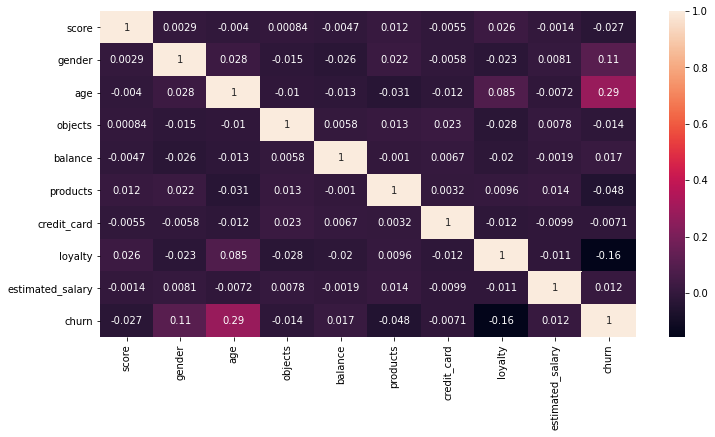

In [16]:
# построим хитмэп корреляции между признаками

corr = data_new.corr()
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True);

На матрице корреляции прослеживается слабая положительная корреляция в 0,3 между возрастом и фактом ухода.

### Оценим средние значения признаков в группах для тех, кто ушел в отток и тех, кто остался  

- для всех признаков

In [17]:
# создадим сгруппированную таблицу по оттоку, посчитаем среднее для всех признаков
# транспонируем таблицу

data_groupby = data_new.groupby('churn').mean().transpose()
data_groupby

churn,0,1
score,651.853196,645.351497
gender,0.427477,0.559156
age,37.408389,44.837997
objects,5.033279,4.932744
balance,119535.864270,120746.971132
products,1.544267,1.475209
credit_card,0.707146,0.699067
loyalty,0.554565,0.360825
estimated_salary,99738.391772,101465.677531


- для заработной платы и баланса на счёте

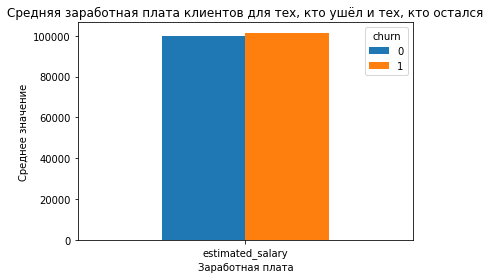

In [18]:
# построим график для среднего значения з/п для тех, кто ушёл и тех, кто остался

data_churn_salary = data_new[['estimated_salary', 'churn']].groupby('churn').mean().transpose()
data_churn_salary.plot(kind='bar')
plt.title('Средняя заработная плата клиентов для тех, кто ушёл и тех, кто остался')
plt.xticks(rotation=0)
plt.xlabel('Заработная плата')
plt.ylabel('Среднее значение');

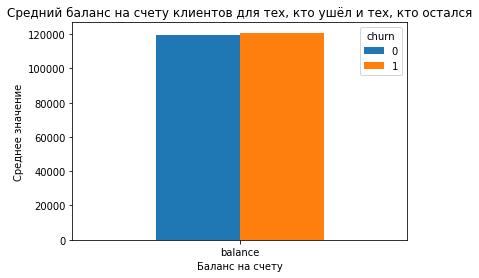

In [19]:
# построим график для среднего баланса счета для тех, кто ушёл и тех, кто остался

data_churn_balance = data_new[['balance', 'churn']].groupby('churn').mean().transpose()
data_churn_balance.plot(kind='bar')
plt.title('Средний баланс на счету клиентов для тех, кто ушёл и тех, кто остался')
plt.xticks(rotation=0)
plt.xlabel('Баланс на счету')
plt.ylabel('Среднее значение');

- для возраста

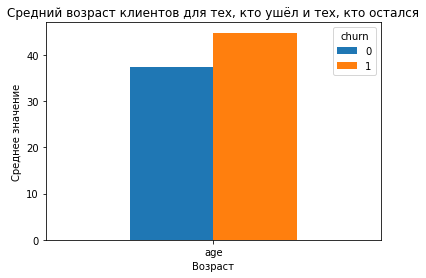

In [20]:
# построим график для среднего баланса счета для тех, кто ушёл и тех, кто остался

data_churn_age = data_new[['age', 'churn']].groupby('churn').mean().transpose()
data_churn_age.plot(kind='bar')
plt.title('Средний возраст клиентов для тех, кто ушёл и тех, кто остался')
plt.xticks(rotation=0)
plt.xlabel('Возраст')
plt.ylabel('Среднее значение');

### Оценим средние значения признаков в группах по городам  

- для всех признаков

In [21]:
# создадим сгруппированную таблицу по оттоку, посчитаем среднее для всех признаков
# транспонируем таблицу

data_city = data_new.groupby('city').mean().transpose()
data_city

city,ростов великий,рыбинск,ярославль
score,651.453567,651.333872,649.668329
gender,0.475488,0.439645,0.450937
age,39.771622,38.890997,38.511767
objects,5.009964,5.032297,5.004587
balance,119730.116134,119814.985923,119927.765597
products,1.519729,1.539362,1.530913
credit_card,0.713830,0.694792,0.706621
loyalty,0.497409,0.529673,0.516753
estimated_salary,101113.435102,99440.572281,99899.180814
churn,0.324432,0.166734,0.161548


- для заработной платы и баланса на счёте

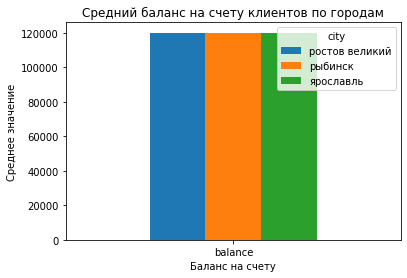

In [22]:
# построим график для среднего баланса счета по городам

data_city_balance = data[['balance', 'city']].groupby('city').mean().transpose()
data_city_balance.plot(kind='bar')
plt.title('Средний баланс на счету клиентов по городам')
plt.xticks(rotation=0)
plt.xlabel('Баланс на счету')
plt.ylabel('Среднее значение');

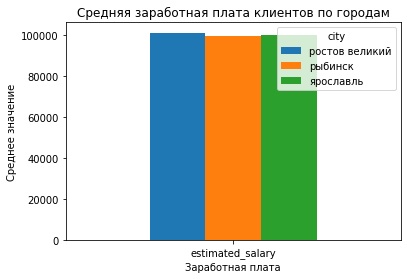

In [23]:
# построим график для среднего значения з/п по городам

data_city_salary = data[['estimated_salary', 'city']].groupby('city').mean().transpose()
data_city_salary.plot(kind='bar')
plt.title('Средняя заработная плата клиентов по городам')
plt.xticks(rotation=0)
plt.xlabel('Заработная плата')
plt.ylabel('Среднее значение');

### Оценим долю оттока по городам

In [24]:
# создадим сводную таблицу по городам и посчитаем кол-во тех, кто ушел и тех, кто остался

data_groupby_city = data.pivot_table(index=['city'], columns='churn', values='user_id', aggfunc='count')

# добавим столбец с процентом ушедших

data_groupby_city['percent'] = data_groupby_city[1]/(data_groupby_city[0]+data_groupby_city[1])*100
data_groupby_city.round(2)

churn,0,1,percent
city,,,
ростов великий,1695,814,32.44
рыбинск,2064,413,16.67
ярославль,4204,810,16.15


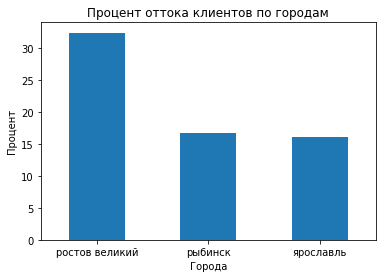

In [25]:
# построим график для кол-ва ушедших клиентов по городам

data_groupby_city['percent'].plot(kind='bar')
plt.title('Процент оттока клиентов по городам')
plt.xticks(rotation=0)
plt.xlabel('Города')
plt.ylabel('Процент');

### Оценим долю отткока по полу

In [26]:
# создадим сводную таблицу по полу и посчитаем кол-во тех, кто ушел и тех, кто остался

data_groupby_gender = data.pivot_table(index=['gender'], columns='churn', values='user_id', aggfunc='count')

# добавим столбец с процентом ушедших

data_groupby_gender['percent'] = data_groupby_gender[1]/(data_groupby_gender[0]+data_groupby_gender[1])*100
data_groupby_gender.round(2)

churn,0,1,percent
gender,,,
0,4559,898,16.46
1,3404,1139,25.07


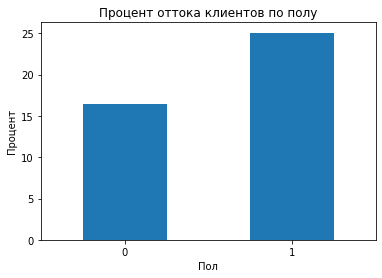

In [27]:
# построим график для кол-ва ушедших клиентов по полу

data_groupby_gender['percent'].plot(kind='bar')
plt.title('Процент оттока клиентов по полу')
plt.xticks(rotation=0)
plt.xlabel('Пол')
plt.ylabel('Процент');

### Оценим долю оттока по кол-ву продуктов

In [28]:
# создадим сводную таблицу по кол-ву продуктов и посчитаем кол-во тех, кто ушел и тех, кто остался

data_groupby_product = data.pivot_table(index=['products'], columns='churn', values='user_id', aggfunc='count')
data_groupby_product[0] = data_groupby_product[0].fillna(0)

# добавим столбец с процентом ушедших

data_groupby_product['percent'] = data_groupby_product[1]/(data_groupby_product[0]+data_groupby_product[1])*100
data_groupby_product.round(2)

churn,0,1,percent
products,,,
1,3675.0,1409.0,27.71
2,4242.0,348.0,7.58
3,46.0,220.0,82.71
4,0.0,60.0,100.00


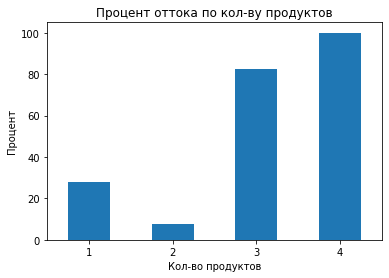

In [29]:
# построим график для кол-ва ушедших клиентов по кол-ву продуктов

data_groupby_product['percent'].plot(kind='bar')
plt.title('Процент оттока по кол-ву продуктов')
plt.xticks(rotation=0)
plt.xlabel('Кол-во продуктов')
plt.ylabel('Процент');

### Посмотрим на признаки только среди женщин  

Так как мы наблюдаем большой процент ухода среди женщин, посмотрим на другие признаки в этом разрезе. Возможно отток из Ростова Великого и возраст связан только с женщинами.

- найдем корреляцию между возрастом и фактом ухода

In [30]:
data_women = data.query('gender == 1')
data_women['age'].corr(data_women['churn'])

0.30303770785039563

- посмотрим распределение женщин по городам

In [31]:
data_women.groupby('city').agg({'age':'count'})

,age
city,
ростов великий,1193
рыбинск,1089
ярославль,2261


- посмотрим распределение женщин по кол-ву продуктов

In [32]:
data_women_pivot = data_women.pivot_table(index=['products'], columns='churn', values='age', aggfunc='count')
data_women_pivot[0] = data_women_pivot[0].fillna(0)

data_women_pivot['percent'] = data_women_pivot[1]/(data_women_pivot[0]+data_women_pivot[1])*100
data_women_pivot.round(2)

churn,0,1,percent
products,,,
1,1534.0,762.0,33.19
2,1850.0,210.0,10.19
3,20.0,129.0,86.58
4,0.0,38.0,100.00


Предположение, что отток связан только с женщинами не подтвердилось.

### Вывод 

- Средний бал кредитного скоринга  650, минимальный и максимальный балы 350 и 850 соответственно.
- Средний возраст 39 лет, самому младшему клиенту 18, самому старшему 92 года. Медианное значение равно 37, следовательно клиентов младше 39 больше.
- Среднее кол-во объектов в собственности равно пяти. 75% клиентов имеют в собственности 3 и более объектов.
- Средний баланс на счету 76 000, медианное значение равно 97 000. Различие обусловленно тем, что у 25% клиентов нулевой баланс счета.
- Большинство клиентов пользуются 1-2 продуктами банка
- Кредитную карту имеют 70% клиентов
- 52% клиентов активны
- Средняя заработная плата клиента составляет 100 000
- 20% клиентов ушли из банка

На матрице корреляции прослеживается положительная корреляция в 0,3 между возрастом и фактом ухода.    

Для ушедших клиентов из всех признаков выделяются:  
- возраст - средний возраст около 45 лет  
- среднее значение баланса на счету - у ушедших он примерно на 20 000 больше. Возможно, это связано с возрастом, так как чем старше клиент, тем больше денег у него на счету  
- кол-во продуктов, которыми пользуется клиент три и более

Уровень заработной платы клиента практически одинаковый как для тех, кто остался, так и для тех, кто ушел.  

После группировки по городам, определили что:  
- баланс на счету клиентов в Ростове Великом почти 2 раза выше, чем в других городах, а уровень заработной платы практически не отличается;  
- самая большая доля ушедших от общего кол-ва клиентов в Ростове Великом - 32%  

Отсюда можно сделать вывод, что отрицательная корреляция между балансом на счету и уходом создается только за счет клиентов в Ростове Великом.  

После группировки по полу, определили, что больший процент ушедших - 25% наблюдается среди женщин. Коэффициент корреляции для возраста и факта ухода только среди женщин такой же как и для обоих полов. Кол-во женщин в Ростове Великом почти такое же как в Рыбинске и почти в два раза меньше, чем в Ярославле.  

Из всего этого следует, что больше всего **склонны к уходу клиенты более старшего возраста обоих полов и женщины разного возраста; клиенты, использующие 3 и более продуктов банка.   
А также наблюдается отток клиентов из банков в Ростове Великом.**  


## Проверка гипотез   

Разделим исходную таблицу на две, для тех, кто ушел и тех, кто остался.

In [33]:
# создадим две новые таблицы и выведем кол-во строк каждой таблицы

users_gone = data_new.query('churn == 1')
display(users_gone.shape[0])

users_stay = data_new.query('churn == 0')
display(users_stay.shape[0])

2037

7963

#### Первая гипотеза  

**Нулевая гипотеза:** доходы тех, кто ушел и тех, кто остался равны.  
**Альтернативная гипотеза:** доходы тех, кто ушел и тех, кто остался не равны.  

**Проверка гипотезы:** сравним средние доходы тех, кто ушел и тех, кто остался.  
Уровень статистической значимости зададим в 5%.  

Проведем t-тест для двух независимых выборок. Выборки по размеру отличаются, укажем араметр equal_var как False.

In [34]:
# проведем т-тест

results = st.ttest_ind (users_gone['estimated_salary'], users_stay['estimated_salary'], equal_var=False) 
results.pvalue

0.228924613051458

p-value выше уровня статистической значимости. Полученные данные не противоречат нулевой гипотезе: доходы тех, кто ушел и тех, кто остался равны.

#### Вторая гипотеза  

**Нулевая гипотеза:** средний возраст тех, кто ушел и тех, кто остался одинаковый.   
**Альтернативная гипотеза:** средний возраст тех, кто ушел и тех, кто остался различается.  

**Проверка гипотезы:** сравним средний возраст тех, кто ушел и тех, кто остался.  
Уровень статистической значимости зададим в 5%.  

Проведем t-тест для двух независимых выборок. Выборки по размеру отличаются, укажем араметр equal_var как False.

In [35]:
# проведем т-тест

results = st.ttest_ind (users_gone['age'], users_stay['age'], equal_var=False) 
results.pvalue

4.7127272656641046e-179

p-value близкое к нулю, ниже уровня статистической значимости. Есть основания отвергнуть нулевую гипотезу, принимаем альтернативную гипотезу: средний возраст тех, кто ушел и тех, кто остался различается.

## Итоги исследования:  

Прежде, чем исследовать данные, мы ознакомились с ними, проверили их корректность, привели к единому стилю написания названия столбцов и все текстовые данные к нижнему регистру, заполнили пропуски, проверили наличие дубликатов.  

Исследуя данные, определили **признаки клиента, склонного к уходу**:  
- клиент в возрасте около 45 лет и старше обоих полов  
- женщины разного возраста 
- использует 3 и более продуктов (скорее всего, это связано с тем, что человек уже давно является клиентом банка, и теперь по какой-то причине решил сменить банк)

Исхода из полученных данных, подтвердили гипотезы:  

1. Доходы тех, кто ушел и тех, кто остался равны.
2. Средний возраст тех, кто ушел и тех, кто остался отличается.

Также наблюдается высокий процент оттока клиентов (32%) в Ростове Великом. Скорее всего, это связано с отделениями банка или с качеством обслуживания.  

**Рекомендации:**

- Создание или улучшение программ лояльности для женщин.
- Предложение выгодных условий обслуживания для клиентов старшего возраста и клиентов, которые давно с банком.
- Запросить данные по обслуживанию клиентов из отделений банков в Ростове Великом, чтобы проанализировать отток.  